# Desafio Prático 1: Visualizando Dados Diferentes
**Descrição:** Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando
Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos
dados, correlações entre variáveis e tendências

**1. Carregar os dados de um arquivo CSV fornecido (saude.csv)**

In [ ]:
import pandas as pd

# carregar o arquivo csv
file_path = '/content/drive/MyDrive/Análise de Dados/Análise de vendas e saúde/saude.csv'
df = pd.read_csv(file_path)

# Visualizando as primeiras linhas dos dados para entender a estrutura
df.head()


,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


**2. Criar um histograma da variável 'age' usando Matplotlib.**

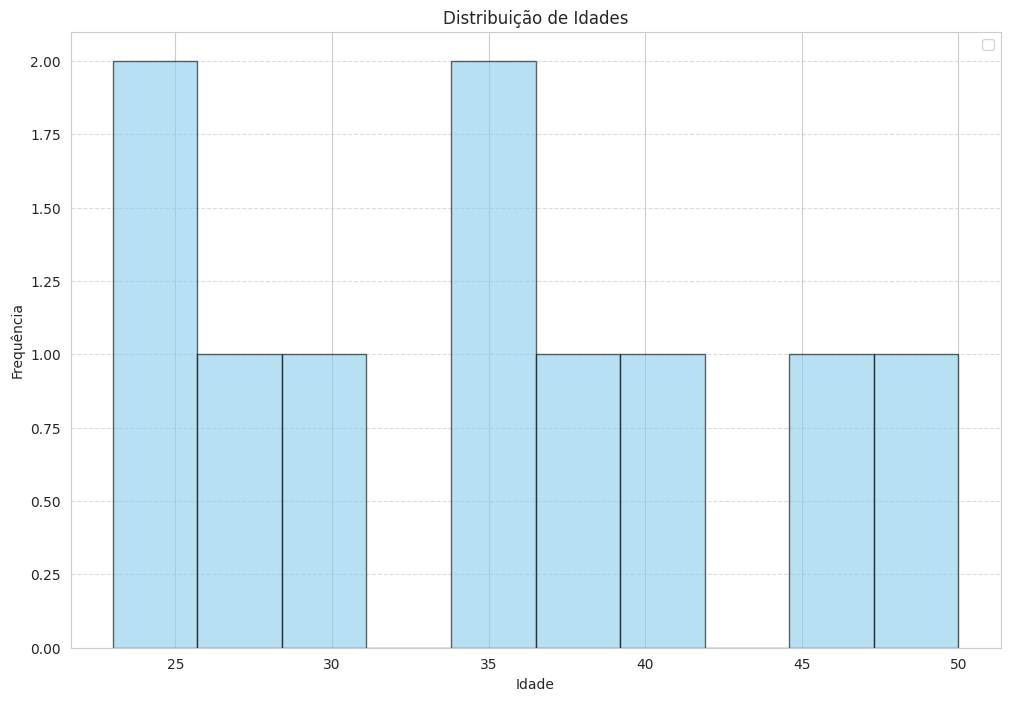

In [ ]:
# Histograma da variável 'age' usando exclusivamente Matplotlib

# Importar Matplotlib
import matplotlib.pyplot as plt

# Definir figura
plt.figure(figsize=(12, 8))

# Criar o histograma com Matplotlib
counts, bins, patches = plt.hist(df['age'], bins=10, edgecolor='black', color='skyblue', alpha=0.6)

# Título e legendas
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

# Grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando
Seaborn**

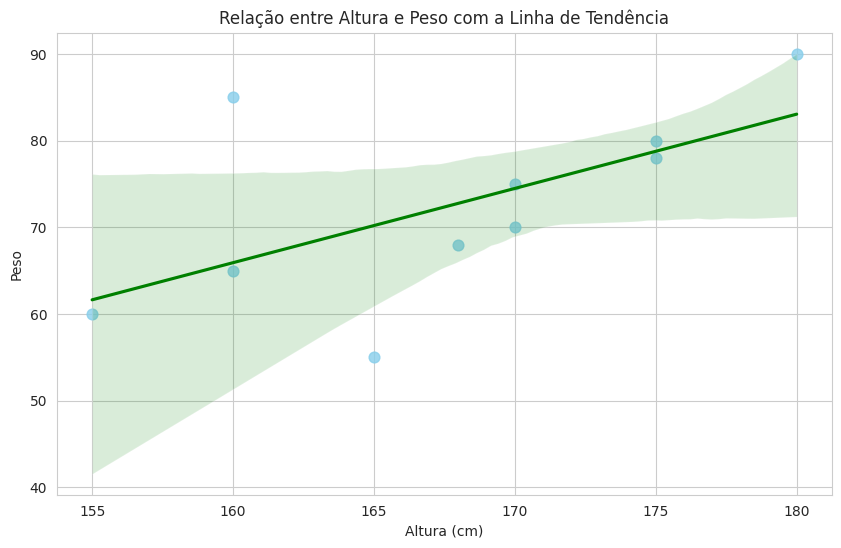

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gráfico de dispersão com linha de regressão e cor aprimorada
sns.regplot(data=df, x='height', y='weight', scatter_kws={'s': 60, 'color': 'skyblue'}, line_kws={'color': 'green'})

# Títulos e rótulos
plt.title('Relação entre Altura e Peso com a Linha de Tendência')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso')

plt.show()

**4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por
'gender' usando Plotly.**

In [ ]:
import plotly.express as px
import pandas as pd

# Carregar os dados corretamente (ajuste o caminho do arquivo)
file_path = '/content/drive/MyDrive/Análise de Dados/Análise de vendas e saúde/saude.csv'
df = pd.read_csv(file_path)

# Confirmar o nome da coluna e usar 'gender' se for o correto
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Criar o gráfico de barras interativo corrigido
fig = px.bar(gender_counts, x='gender', y='count', title='Contagem de Indivíduos por Gênero',
             labels={'gender': 'Gênero', 'count': 'Contagem'},
             color='gender', color_discrete_sequence=px.colors.qualitative.Pastel, text='count')

# Layout e posicionamento dos textos
fig.update_layout(xaxis_title='Gênero', yaxis_title='Contagem', template='plotly_white')
fig.update_traces(textposition='outside')

fig.show()


In [ ]:
# Exibir a quantidade exata de indivíduos por gênero
gender_counts_exact = df['gender'].value_counts()
gender_counts_exact


,count
gender,
M,5
F,5


# Desafio Prático 2: Séries Temporais

**Descrição:** Neste desafio, suas alunas irão analisar uma série temporal de dados de vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar tendências e sazonalidades.

**1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).**


In [ ]:
import pandas as pd

# carregar o arquivo csv
file_path = '/content/drive/MyDrive/Análise de Dados/Análise de vendas e saúde/vendas.csv'
df = pd.read_csv(file_path)

# Visualizando as primeiras linhas dos dados para entender a estrutura
df.head()


,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


**2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.

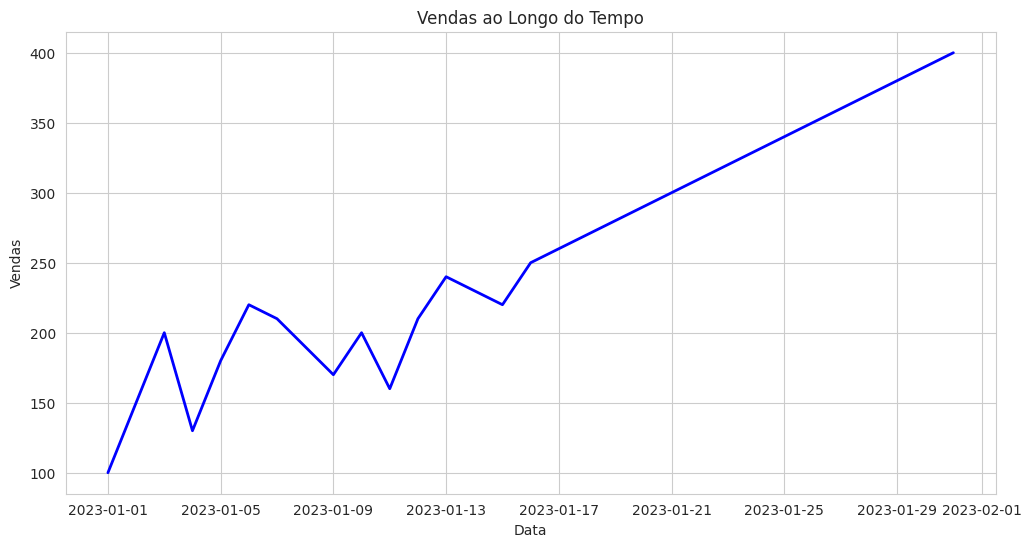

In [ ]:
import pandas as pd  # Para manipulação de dados
import matplotlib.pyplot as plt  # Para visualização gráfica

sales_df = pd.read_csv('/content/drive/MyDrive/Análise de Dados/Análise de vendas e saúde/vendas.csv')

# Converter a coluna 'date' para o tipo datetime para facilitar a plotagem
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Criar o gráfico de linhas das vendas ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(sales_df['date'], sales_df['sales'], color='blue', linewidth=2)

# Adicionar título e rótulos aos eixos
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)

plt.show()

**3. Criar um gráfico de decomposição sazonal usando Seaborn.**

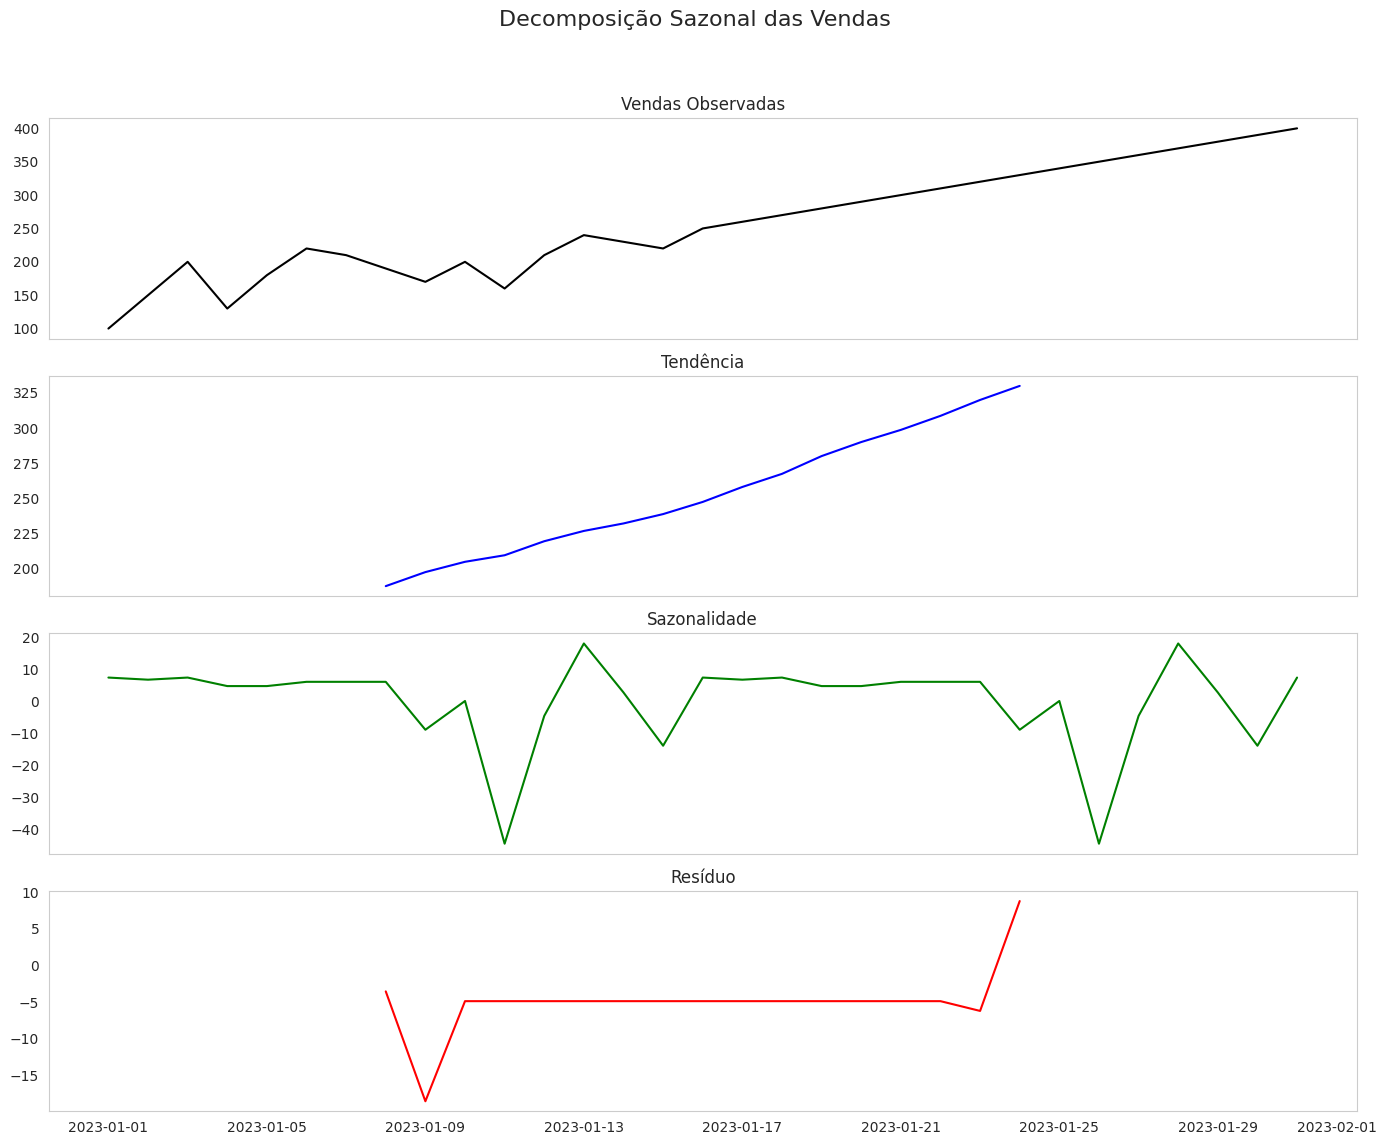

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = '/content/drive/MyDrive/Análise de Dados/Análise de vendas e saúde/vendas.csv'
sales_df = pd.read_csv(file_path)

# Carregar a base de dados e converter a coluna 'date' para datetime
sales_df['date'] = pd.to_datetime(sales_df['date'])
sales_df.set_index('date', inplace=True)

# Calcular o período com base na sazonalidade desejada
period = 15

# Verificar se há dados suficientes para o período selecionado
if len(sales_df) < 2 * period:
    print(f"Warning: Your data has only {len(sales_df)} observations, which is less than 2 full cycles for a period of {period}. Results might be unreliable.")
    print(f"Consider adjusting the 'period' or gathering more data.")

# Decomposição sazonal
decomposition = seasonal_decompose(sales_df['sales'], model='additive', period=period)

# Configurar o layout para visualização profissional
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Plotar cada componente com títulos personalizados e sem grades desnecessárias
ax1.plot(decomposition.observed, color='black')
ax1.set_title('Vendas Observadas')
ax1.grid(False)

ax2.plot(decomposition.trend, color='blue')
ax2.set_title('Tendência')
ax2.grid(False)

ax3.plot(decomposition.seasonal, color='green')
ax3.set_title('Sazonalidade')
ax3.grid(False)

ax4.plot(decomposition.resid, color='red')
ax4.set_title('Resíduo')
ax4.grid(False)

# Ajustar layout e título principal
plt.suptitle('Decomposição Sazonal das Vendas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo
do tempo usando Plotly**

In [ ]:
import plotly.express as px

# Criar gráfico de linha interativo para as vendas ao longo do tempo usando Plotly
fig = px.line(sales_df, x=sales_df.index, y='sales', title='Vendas ao Longo do Tempo', labels={'sales': 'Vendas', 'date': 'Data'})

# Melhorar o layout
fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Vendas',
    template='plotly_white',
    hovermode='x unified'  # Exibe o hover em um formato unificado para facilitar a leitura
)

# Exibir o gráfico interativo
fig.show()
